In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep

f = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_xsec_example.root")
f.keys()

['p8_ee_Zmumu_ecm91;1',
 'p8_ee_Zmumu_ecm91/ninitial;1',
 'p8_ee_Zmumu_ecm91/nfinal;1',
 'p8_ee_Zmumu_ecm91/leps_all_p;1',
 'p8_ee_Zmumu_ecm91/leps_all_theta;1',
 'p8_ee_Zmumu_ecm91/leps_all_phi;1',
 'p8_ee_Zmumu_ecm91/leps_all_q;1',
 'p8_ee_Zmumu_ecm91/leps_all_no;1',
 'p8_ee_Zmumu_ecm91/m_inv;1',
 'p8_ee_Zmumu_ecm91/emiss;1',
 'p8_ee_Zmumu_ecm91/meta;1',
 'p8_ee_Ztautau_ecm91;1',
 'p8_ee_Ztautau_ecm91/ninitial;1',
 'p8_ee_Ztautau_ecm91/nfinal;1',
 'p8_ee_Ztautau_ecm91/leps_all_p;1',
 'p8_ee_Ztautau_ecm91/leps_all_theta;1',
 'p8_ee_Ztautau_ecm91/leps_all_phi;1',
 'p8_ee_Ztautau_ecm91/leps_all_q;1',
 'p8_ee_Ztautau_ecm91/leps_all_no;1',
 'p8_ee_Ztautau_ecm91/m_inv;1',
 'p8_ee_Ztautau_ecm91/emiss;1',
 'p8_ee_Ztautau_ecm91/meta;1']

Text(0.5, 1.0, 'Transverse Momentum Z$\\rightarrow \\mu \\mu$')

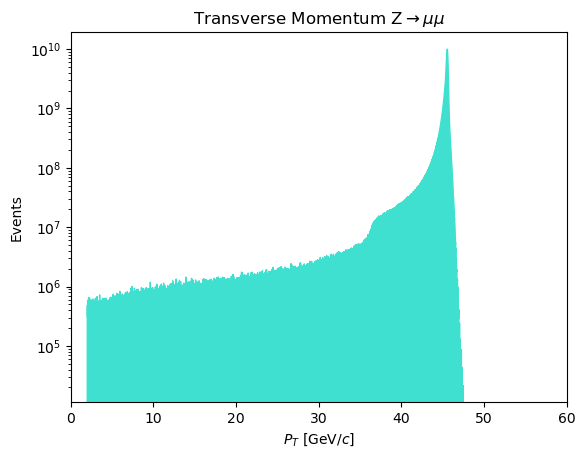

In [2]:
p = f['p8_ee_Zmumu_ecm91/leps_all_p;1']

yp,xp = p.to_numpy()

plt.stackplot(xp[:-1], yp, color = "turquoise")
plt.xlim(0,60)
plt.xlabel("$P_{T}$ [GeV/$c$]")
plt.ylabel("Events")
plt.yscale("log")
plt.title(r"Transverse Momentum Z$\rightarrow \mu \mu$")
#plt.savefig("P_Z_mumu_filterfree.png")

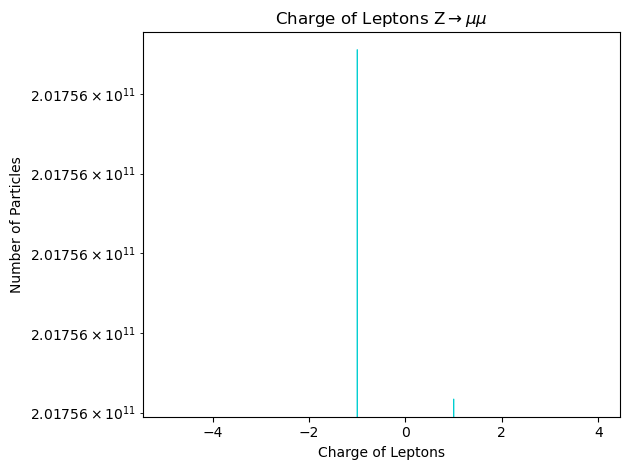

In [3]:
q = f['p8_ee_Zmumu_ecm91/leps_all_q;1']

yq,xq = q.to_numpy()
plt.stackplot(xq[:-1], yq, color = "darkturquoise")
plt.xlabel("Charge of Leptons")
plt.ylabel("Number of Particles")
plt.yscale("log")
plt.title(r"Charge of Leptons Z$\rightarrow \mu \mu$")
plt.tight_layout()
#plt.savefig("my_codes/images/q_Z_mumu_filterfree.png")

Text(0.5, 1.0, 'Number of Leptons Z$\\rightarrow \\mu \\mu$')

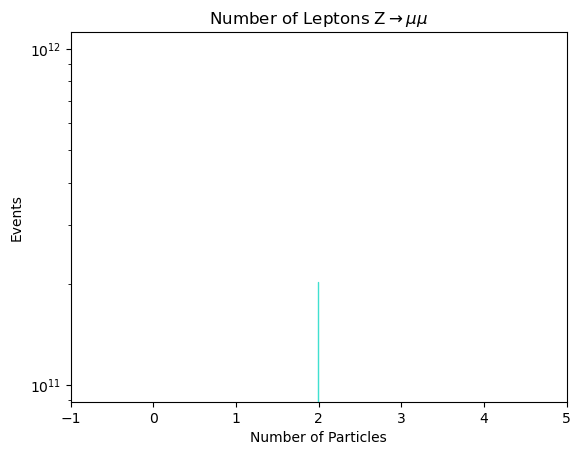

In [4]:
no = f['p8_ee_Zmumu_ecm91/leps_all_no;1']

yno,xno = no.to_numpy()
plt.stackplot(xno[:-1],yno, color = "turquoise")
plt.xlim(-1, 5)
plt.yscale("log")
plt.ylabel("Events")
plt.xlabel("Number of Particles")
plt.title(r"Number of Leptons Z$\rightarrow \mu \mu$")
#plt.savefig("my_codes/images/no_Z_mumu_filterno.png")

Text(0.15, 0.85, 'Cut on number of leptons > 1')

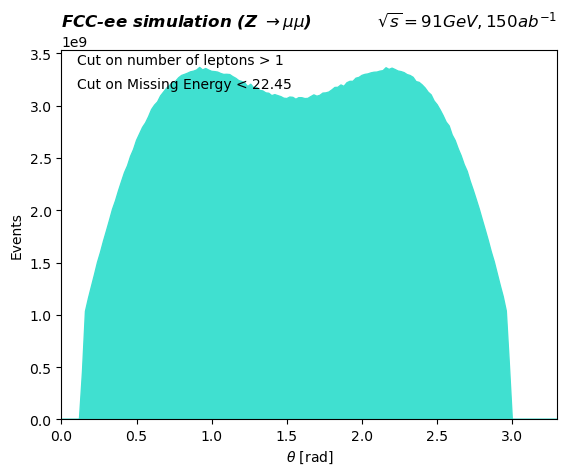

In [10]:
theta = f['p8_ee_Zmumu_ecm91/leps_all_theta;1']

y, x = theta.to_numpy()
plt.stackplot(x[:-1],y, color = "turquoise")
plt.xlim(0,3.3)
plt.ylabel("Events")
plt.xlabel(r"$\theta$ [rad]")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title(r"FCC-ee simulation (Z $\rightarrow \mu \mu$)", loc = "left", weight = "bold", style = "italic")
plt.figtext(0.15, 0.8, "Cut on Missing Energy < 22.45")
plt.figtext(0.15, 0.85, "Cut on number of leptons > 1")

#plt.savefig("images/theta_Z_mumu_filtere_no.png")
#plt.savefig("my_codes/images/theta_Z_mumu_filterfree.png")
#plt.savefig("/home/submit/marinamn/public_html/theta_Z_mumu_filterfree.png")

Text(0, 0.5, 'Events')

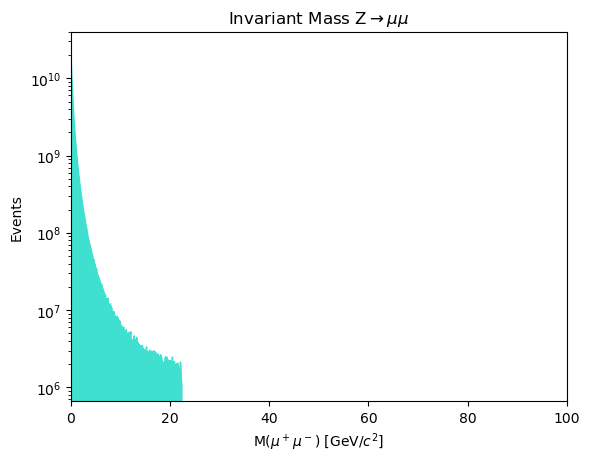

In [19]:
im = f['p8_ee_Zmumu_ecm91/emiss;1']

yim,xim = im.to_numpy()
plt.stackplot(xim[:-1],yim, color = "turquoise")
plt.xlim(0,100)
plt.yscale("log")
plt.xlabel(r"M($\mu^+ \mu^-$) [GeV/$c^2$]")
plt.title(r"Invariant Mass Z$\rightarrow \mu \mu$")
plt.ylabel("Events")
#plt.savefig("my_codes/images/m_inv_Z_mumu_filterfree.png")

Text(0.5, 1.0, 'Non Normalized Invariant Mass: Muon and Tau')

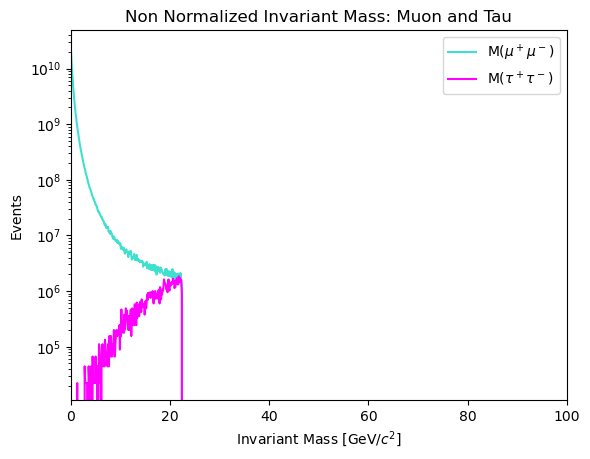

In [20]:
imtau = f['p8_ee_Ztautau_ecm91/emiss;1']
yimtau,ximtau = imtau.to_numpy()

plt.plot(xim[:-1], yim, color = "turquoise", label = r"M($\mu^+ \mu^-$)")
plt.plot(ximtau[:-1],yimtau, color = "magenta", label = r"M($\tau^+ \tau^-$)")
plt.xlim(0,100)
plt.yscale("log")
plt.xlabel(r"Invariant Mass [GeV/$c^2$]")
plt.ylabel("Events")
plt.legend()
plt.title("Non Normalized Invariant Mass: Muon and Tau")
#plt.savefig("my_codes/images/m_inv_Z_mumu_tautau_filterfree.png")

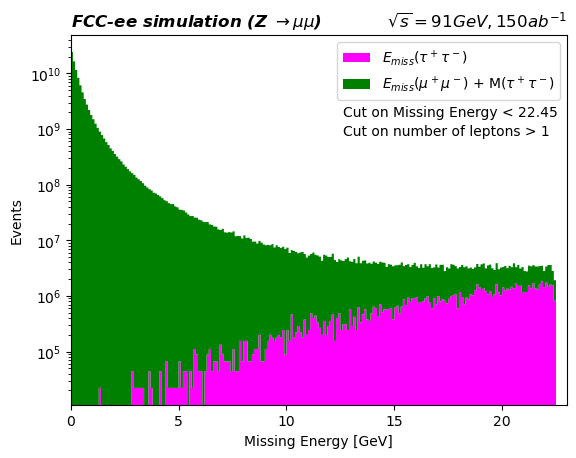

In [32]:
hep.histplot([imtau,im], stack = True, label = [r"$E_{miss}$($\tau^+ \tau^-$)", r"$E_{miss}$($\mu^+ \mu^-$) + M($\tau^+ \tau^-$)"], color = ["magenta", "green"], histtype = "fill")
plt.yscale("log")
plt.legend()
plt.xlabel("Missing Energy [GeV]")
plt.ylabel("Events")
plt.xlim(0,23)
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title(r"FCC-ee simulation (Z $\rightarrow \mu \mu$)", loc = "left", weight = "bold", style = "italic")
plt.figtext(0.55, 0.71, "Cut on Missing Energy < 22.45")
plt.figtext(0.55, 0.67, "Cut on number of leptons > 1")
plt.savefig("images/emiss_Z_mumutautau_filtere_no.png")
#plt.savefig("my_codes/images/m_inv_Z_mumu_tautau_stack_filterfree.png")

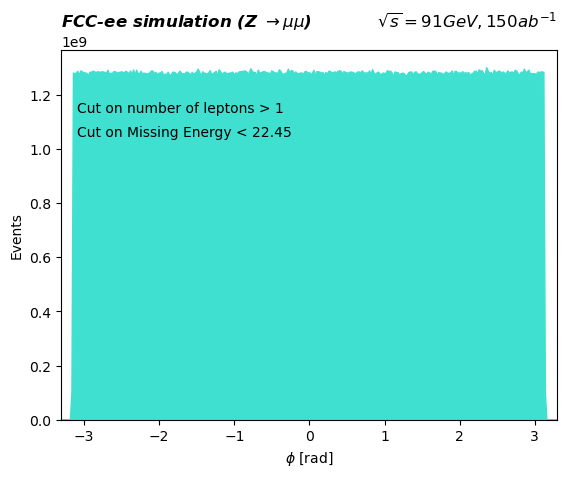

In [15]:
phi = f['p8_ee_Zmumu_ecm91/leps_all_phi;1']

yphi, xphi = phi.to_numpy()
plt.stackplot(xphi[:-1],yphi, color = "turquoise")
plt.xlim(-3.3,3.3)
plt.ylabel("Events")
plt.xlabel(r"$\phi$ [rad]")
plt.title(r"$\sqrt{s} = 91 GeV, 150 ab^{-1}$", loc = "right")
plt.title(r"FCC-ee simulation (Z $\rightarrow \mu \mu$)", loc = "left", weight = "bold", style = "italic")
plt.figtext(0.15, 0.7, "Cut on Missing Energy < 22.45")
plt.figtext(0.15, 0.75, "Cut on number of leptons > 1")
plt.savefig("images/phi_Z_mumu_filtere_no.png")

In [114]:
newxim = []
newyim = []
newyimtau = []

for i in range(0, len(xim)-1):
    s = np.sum(yim, initial=yim[i])
    b = np.sum(yimtau, initial=yimtau[i])
    ratio = s/np.sqrt(s+b)
    newxim.append(xim[i])
    newyim.append(ratio)
    #newyimtau.append(yimtau[i]/sum(yimtau))
        

(0.0, 100.0)

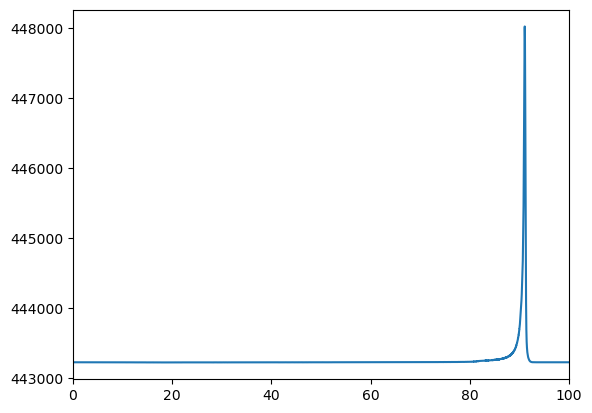

In [115]:
plt.plot(newxim,newyim)
#plt.plot(newxim[:],newyimtau)
plt.xlim(0,100)
#plt.yscale("log")

In [17]:
print(s)
print(b)

1.0
1.0


In [118]:
#print("Muon events = ", sum(newyim))
#print("Tau Events = ", sum(newyimtau))

In [119]:
#print("Muon events = ", sum(newyim)*sum(yim))
#print("Tau Events = ", sum(newyimtau)*sum(yimtau))

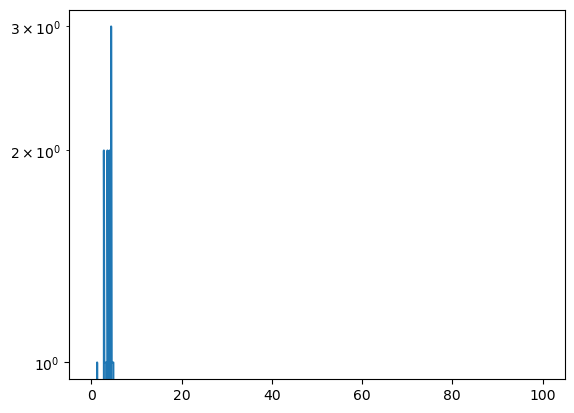

In [120]:
miss = f['p8_ee_Ztautau_ecm91/emiss;1']

ymiss,xmiss = miss.to_numpy()
plt.plot(xmiss[:-1],ymiss)
plt.yscale("log")

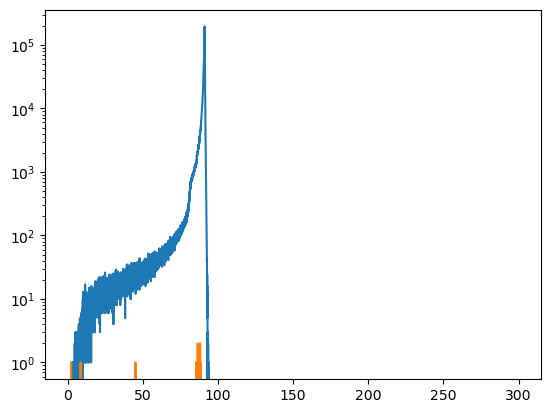

In [121]:
plt.plot(xim[:-1],yim, label = "Muon invariant mass")
plt.plot(ximtau[:-1],yimtau, label = "Tau invariant mass")
plt.yscale("log")